In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../')
sys.path.append('../')
from utils import get_testdata_path, get_tmp_path

In [2]:
import numpy as np
from pyproj import CRS
from pyspatialkit.storage.geostorage import GeoStorage
from pyspatialkit.dataobjects.georaster import GeoRaster
from pyspatialkit.spacedescriptors.georect import GeoRect
from pyspatialkit.storage.raster.georasterlayer import GeoRasterLayer
from pyspatialkit.crs.geocrs import NoneCRS, GeoCrs


In [10]:
storage = GeoStorage(directory_path=get_tmp_path() / 'geostorage')

In [11]:
raster1 = GeoRaster.from_file(get_testdata_path() / "dop100rgbi_32_734_5748_2_st_2020.tif", band=[1,2,3])
raster2 = GeoRaster.from_file(get_testdata_path() / "dop100rgbi_32_736_5748_2_st_2020.tif", band=[1,2,3])

In [14]:
raster_layer = storage.add_raster_layer('raster_layer', 3, raster1.dtype, crs=raster1.crs, bounds=[-1877994, 3932281, 836715, 9440581])

A layer with name raster_layer already exists, returning existing layer.


In [15]:
raster_layer.writer_raster_data(raster1)
raster_layer.writer_raster_data(raster2)

In [16]:
query_rect = GeoRect((12.425537109375004, 51.844482421875), (12.43652343750001, 51.85546875), crs=GeoCrs(CRS.from_epsg(4326)))
query_rect.to_crs(raster1.crs)

In [19]:
raster1.georect.get_bounds()

(734000.5, 5747999.5, 736000.5, 5749999.5)

In [18]:
query_rect.get_bounds()

(735888.3227176276, 5749290.47816985, 736702.3232643661, 5750547.522260551)

In [17]:
res = raster_layer.get_raster_for_rect(query_rect, no_data_value=int(0))

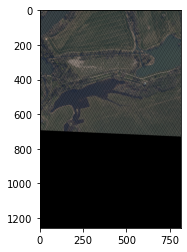

In [18]:
res.plot()